In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


merged_data = pd.read_csv(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\simulation_results.csv")

X = merged_data[
    [
        "wealth",
            "career_years",
            "sex",
            "job_status",
            "has_disease",
            "has_car",
            "has_house",
            "num_children",
            "personal_luxuries",
            "health_care_cost",
    ]
]

y = merged_data["group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

y.value_counts()

group
1    21086
0    18946
Name: count, dtype: int64

In [2]:
model = joblib.load(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\models\LightGBM_nl.pkl")
y_pred = model.predict(X_test)

hasCar = X_test["has_car"]

mf = MetricFrame(
    metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=hasCar
)

print("Overall Metric Frame: ", mf.overall)
print("\nMetric Frame by group: ", mf.by_group)

C:\Users\mcarl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Overall Metric Frame:  0.6201498751040799

Metric Frame by group:  has_car
False    0.588133
True     0.623527
Name: accuracy_score, dtype: float64


The	Overall Metric Frame (0.6201) represents the specified overall performance metric (accuracy) across all groups combined. The value of 0.6201 suggests that the model’s accuracy is about 62.0% when evaluated on the entire dataset, without differentiating by groups.

The Metric Frame by Group (regarding Has Car) evaluates the model’s accuracy score for specific groups within the feature Has Car, divided into two categories, False and True:

- False (0.5881): For the group labeled False under Has Car, the model has an accuracy score of 58.8%. 
- True (0.6235): For the group labeled True under Has Car, the accuracy is 62.3%.

array([[<Axes: title={'center': 'accuracy'}, xlabel='has_car'>,
        <Axes: title={'center': 'precision'}, xlabel='has_car'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='has_car'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='has_car'>,
        <Axes: title={'center': 'selection rate'}, xlabel='has_car'>,
        <Axes: title={'center': 'count'}, xlabel='has_car'>],
       [<Axes: xlabel='has_car'>, <Axes: xlabel='has_car'>,
        <Axes: xlabel='has_car'>]], dtype=object)

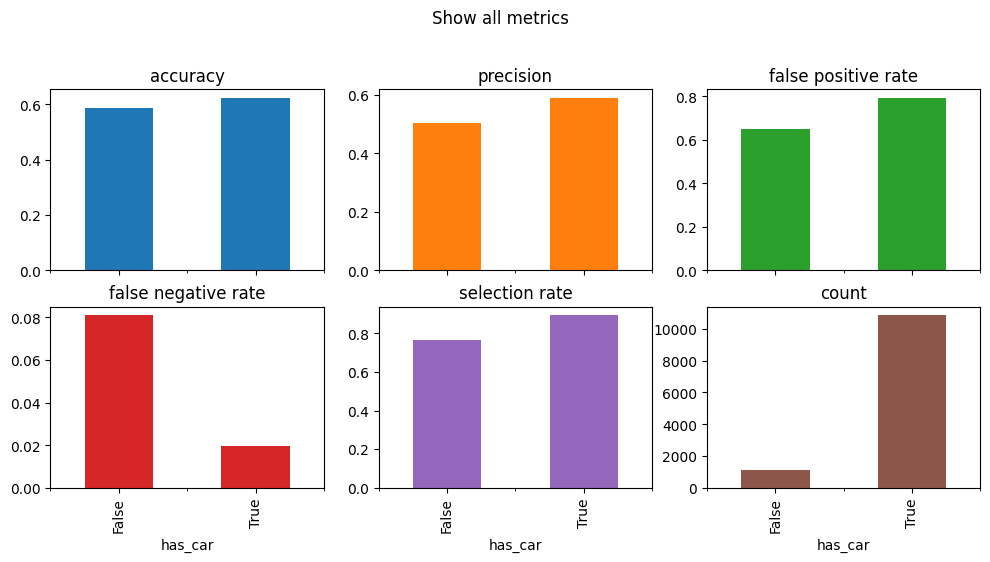

In [3]:
from fairlearn.metrics import (MetricFrame,  false_positive_rate,
    false_negative_rate, selection_rate, count)
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=hasCar
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [4]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

np.random.seed(42)

constraint = DemographicParity()
hasCar = X_train["has_car"]
mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_train, y_train, sensitive_features=hasCar)

y_pred_mitigated = mitigator.predict(X_test)

hasCar = X_test["has_car"]
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=hasCar)

sr_mitigated.overall

0.5387177352206495

In [5]:
print("\nMetric Frame by group: ", sr_mitigated.by_group)


Metric Frame by group:  has_car
False    0.539267
True     0.538660
Name: selection_rate, dtype: float64
